In [1]:
import pandas as pd
import seaborn as sb
from typing import Any

In [ ]:
df_1 = pd.read_csv("dataset/dataset_1_20000.csv", error_bad_lines=False);
df_2 = pd.read_csv("dataset/dataset_20001_40000.csv", error_bad_lines=False);
df_3 = pd.read_csv("dataset/dataset_40001_60000.csv", error_bad_lines=False);
df_4 = pd.read_csv("dataset/dataset_60001_80000.csv", error_bad_lines=False);
df_5 = pd.read_csv("dataset/dataset_80001_100000.csv", error_bad_lines=False);

In [3]:
complete_df = df_1.append(df_2).append(df_3).append(df_4).append(df_5)

In [11]:
complete_df.head()

,ubigeo,place,address,department,province,district,copy_code,observation,description,candidates,...,votos_nulos_code,votos_nulos_congresal,votos_impugnados_total_valids,votos_impugnados_total_emiteds,votos_impugnados_code,votos_impugnados_congresal,total_votos_emitidos_total_valids,total_votos_emitidos_total_emiteds,total_votos_emitidos_code,total_votos_emitidos_congresal
0,10101.0,IE 18288 ISABEL LYNCH DE RUBIO,JR AYACUCHO 870,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,91L,CONTABILIZADAS NORMALES,ACTA ELECTORAL NORMAL,0.0,...,80,14,None,0.0,80.0,0,92.991,100.0,None,214.0
1,10101.0,IE 18288 ISABEL LYNCH DE RUBIO,JR AYACUCHO 870,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,96A,CONTABILIZADAS NORMALES,ACTA ELECTORAL NORMAL,0.0,...,80,16,None,0.0,80.0,0,92.92,100.0,None,226.0
2,10101.0,IE 18288 ISABEL LYNCH DE RUBIO,JR AYACUCHO 870,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,97A,CONTABILIZADAS NORMALES,ACTA ELECTORAL NORMAL,0.0,...,80,19,None,0.0,80.0,0,90.278,100.0,None,216.0
3,10101.0,IE 18288 ISABEL LYNCH DE RUBIO,JR AYACUCHO 870,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,94L,CONTABILIZADAS NORMALES,ACTA ELECTORAL NORMAL,0.0,...,80,14,None,0.0,80.0,0,92.827,100.0,None,237.0
4,10101.0,IE 18288 ISABEL LYNCH DE RUBIO,JR AYACUCHO 870,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,93P,CONTABILIZADAS NORMALES,ACTA ELECTORAL NORMAL,0.0,...,80,19,None,0.0,80.0,0,90.991,100.0,None,222.0


In [4]:
def valid_datum(x: Any) -> bool:
    if pd.isna(x):
        return False
    
    return x.replace(".","",1).isdigit()

In [5]:
peru_libre_valids = "partido_politico_nacional_peru_libre_total_valids"
complete_df = complete_df[complete_df[peru_libre_valids].astype(pd.StringDtype()).apply(valid_datum)]
complete_df[peru_libre_valids] = complete_df[peru_libre_valids].astype(pd.StringDtype()).astype(pd.Float64Dtype())

fuerza_popular_valids = "fuerza_popular_total_valids"
complete_df = complete_df[complete_df[fuerza_popular_valids].astype(pd.StringDtype()).apply(valid_datum)]
complete_df[fuerza_popular_valids] = complete_df[fuerza_popular_valids].astype(pd.StringDtype()).astype(pd.Float64Dtype())

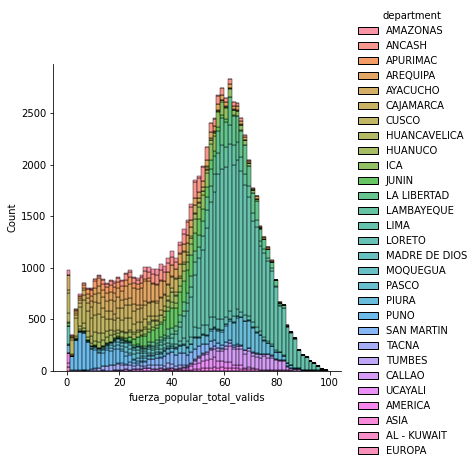

In [16]:
sb.displot(complete_df, x=fuerza_popular_valids, hue="department", multiple="stack")

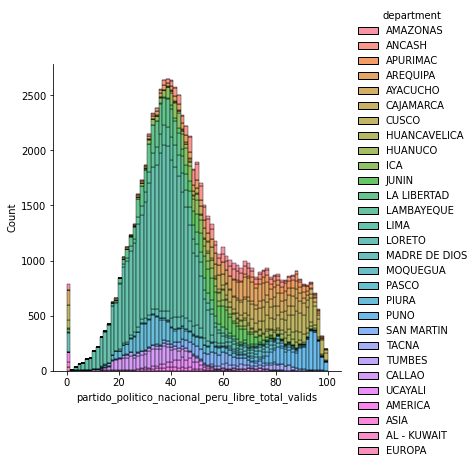

In [14]:
sb.displot(complete_df, x=peru_libre_valids, hue="department", multiple="stack")

In [18]:
complete_df.to_csv("dataset/full_sanitized_dataset.csv")